<a href="https://colab.research.google.com/github/jupeiyun/Chemoinformatics_Peiyun_Aram/blob/main/chemo_GCN_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Continuation of GCN with Google Colab due to Environment Setup and Compatibility

The implementation of the Graph Convolutional Network (GCN) was carried out on Google Colab, as several essential deep learning packages required for the model were incompatible with Apple Silicon architecture. During setup, multiple Python versions (3.8, 3.11, and 3.12) were tested but resulted in persistent dependency and compatibility issues, particularly with libraries such as PyTorch and DeepChem. After iterative troubleshooting, the environment was successfully stabilized using Python 3.9, which provided the best balance between compatibility and functionality, allowing the GCN workflow to run smoothly with only minor compromises.

In [ ]:
# Citation: https://stackoverflow.com/questions/76837647/how-to-downgrade-python-version-to-3-9-in-colab-without-creating-virtual-environ

#Downgrade to Python 3.9 for compatiibility of Numpy, deepchem3
!apt-get install python3.9
!apt-get update -y
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!update-alternatives --config python3
# select python version
!apt install python3-pip
!apt install python3.9-distutils
!python --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 19.0 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.24-1+jammy1 [838 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.24-1+jammy1 [2,075 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-stdlib amd64 3.9.24-1+jammy1 [1,845 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu ja

In [ ]:
#package installation

!pip install -U pip setuptools wheel cython

!pip install -q tensorflow==2.11 scikit-learn pandas matplotlib seaborn tqdm requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.1
    Not uninstalling wheel at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'wheel'. No files were found to uninstall.
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.1.2
    Not uninstalling setuptools at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'setuptools'. No files were found to uninstall.
  Attempting uninstall: pip
    Found existing installation: pip 22.0.2
    Not uninstalling pip at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'pip'. No files were found to unins

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/base_command.py", line 107, in _run_wrapper
    status = _inner_run()
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/base_command.py", line 98, in _inner_run
    return self.run(options, args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/req_command.py", line 71, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/commands/install.py", line 393, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 98, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/resolvelib/resolvers/resolution.py", line 596, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/res

In [ ]:
!pip install -q deepchem rdkit

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

# 5. Data Loading and Exploration

Similar Approach on data loading and exploration applied to random forest is now transfered to run Graph Convolutional Network.

In [ ]:
import deepchem as dc
import tensorflow as tf
import rdkit
import deepchem as dc
from deepchem.metrics import Metric, r2_score, mean_absolute_error
from deepchem.feat import ConvMolFeaturizer
from deepchem.splits import ScaffoldSplitter
import os
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import RDLogger
from google.colab import drive
RDLogger.DisableLog('rdApp.*')

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
#Loading dataset and operate the same as RF from google drive
drive.mount('/content/drive')

refined_path = "/content/drive/MyDrive/v2015/INDEX_refined_data.2015"

refined_df = pd.read_csv(
    refined_path,
    sep=r"\s+",
    comment="#",
    header=None,
    engine="python"
)
refined_df.columns = ["PDB_ID", "Resolution", "Year", "pK", "K", "NA", "Reference", "Ligand_Name"]
refined_df = refined_df[["PDB_ID", "pK", "K", "Reference", "Ligand_Name", "Resolution"]]

print(" Refined dataset size:", refined_df.shape)
refined_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Refined dataset size: (3706, 6)


,PDB_ID,pK,K,Reference,Ligand_Name,Resolution
0,2r58,2.0,Kd=10mM,2r58.pdf,(MLY),2.00
1,3c2f,2.0,Kd=10.1mM,3c2f.pdf,(PRP),2.35
2,3g2y,2.0,Ki=10mM,3g2y.pdf,(GF4),1.31
3,3pce,2.0,Ki=10mM,3pce.pdf,(3HP),2.06
4,4qsu,2.0,Kd=10mM,4qsu.pdf,(TDR),1.90


In [ ]:
# Filter dataset that has empty or incompete dataset associated with their PID
from tqdm import tqdm
import os
from rdkit import Chem

base_dir = "/content/drive/MyDrive/v2015/"

valid_row = []
skip_count = 0

#ChatGPT optimized for speed as the checking was taking too long
for pdb_id, pk_str in tqdm(zip(refined_df["PDB_ID"], refined_df["pK"]),
                           total=len(refined_df),
                           desc="Processing ligands"):
    try:
        sdf_path = os.path.join(base_dir, pdb_id, f"{pdb_id}_ligand.sdf")
        if not os.path.exists(sdf_path):
            continue

        mol = Chem.SDMolSupplier(sdf_path, removeHs=False, sanitize=True)[0]
        if mol is None or pd.isna(pk_str):
            continue

        smi = Chem.MolToSmiles(mol)
        valid_row.append((smi, float(pk_str)))
    except Exception:
        continue

print("Usable ligands:", len(valid_row))

Processing ligands: 100%|██████████| 3706/3706 [06:11<00:00,  9.96it/s]

Usable ligands: 1994


The most common way to assess the feature is to use smiles (one-dimensional string format for representing chemical molecular structures)

In [ ]:
from tqdm import tqdm

#Conversion of SMILES to https://www.kaggle.com/code/mtinti/how-to-compute-t-smiles
smiles, y = zip(*valid_row)
smiles, y = list(smiles), np.array(y, dtype=float)

#Implements the featurization to implement Duvenaud graph convolutions. https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html
featurizer = ConvMolFeaturizer()
valid_smiles = []
valid_y = []

#ChatGPT generated to loop and search invalid errors to make sure only valid smiles dataset was selected
for s, target in tqdm(zip(smiles, y), total=len(smiles)):
    try:
        mol = Chem.MolFromSmiles(s)
        if mol is None:
            continue
        feats = featurizer.featurize([s])
        if len(feats) == 0:
            continue
        valid_smiles.append(s)
        valid_y.append(target)
    except Exception as e:
        continue

X = featurizer.featurize(valid_smiles)
dataset = dc.data.NumpyDataset(X=X, y=np.array(valid_y), ids=valid_smiles)
print(f"DeepChem dataset: {dataset}")
print(f"Percetage featurized {len(valid_smiles)} / {len(smiles)} molecules")

100%|██████████| 1994/1994 [00:06<00:00, 306.71it/s]


DeepChem dataset: <NumpyDataset X.shape: (1970,), y.shape: (1970,), w.shape: (1970,), task_names: [0]>
Percetage featurized 1970 / 1994 molecules


In [ ]:
#Split the dataset with 7:2:1
splitter = ScaffoldSplitter()
train, valid, test = splitter.train_valid_test_split(
    dataset, frac_train=0.7, frac_valid=0.1, frac_test=0.2
)
print(f"Train: {len(train)}, Valid: {len(valid)}, Test: {len(test)}")

Train: 1379, Valid: 196, Test: 395


In [ ]:
#Chatgpt helped with environment config

# === 1️⃣ Install Miniconda and configure ===
!wget -q https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O miniconda.sh
!bash miniconda.sh -b -p /usr/local/miniconda
!source /usr/local/miniconda/etc/profile.d/conda.sh
!conda update -n base -c conda-forge conda -y
!conda config --remove-key channels || true
!conda config --add channels conda-forge
!conda config --set channel_priority strict

# === 2️⃣ Create a clean environment ===
!conda create -y -n deepchem39 python=3.9 tensorflow=2.11 keras=2.11 deepchem=2.7.1 rdkit -c conda-forge

# === 3️⃣ List environments to confirm ===
!conda info --envs

In [ ]:
#Chatgpt helped with environment config

# Install matching PyTorch and PyG packages inside deepchem39
!/usr/local/envs/deepchem39/bin/python -m pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0 -q
!/usr/local/envs/deepchem39/bin/python -m pip install torch-geometric -f https://data.pyg.org/whl/torch-2.4.0+cpu.html -q


ERROR: Operation cancelled by user


In [ ]:
#Chatgpt helped with environment config

!/usr/local/envs/deepchem39/bin/python -m pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.4.0+cpu.html -q


In [ ]:
import torch
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from deepchem.feat.mol_graphs import ConvMol

import numpy as np
data = np.load("/content/drive/MyDrive/pdbbind_features_refined.npz", allow_pickle=True)
X, y, smiles = data["X"], data["y"], data["smiles"]
print(f"Loaded dataset: {len(X)} molecules")

# Convert ConvMol features to PyG graphs
graphs = []
for mol, target in zip(X, y):
    if isinstance(mol, ConvMol):
        adj = mol.get_adjacency_list()
        edge_index = torch.tensor(
            [[u for v in range(len(adj)) for u in adj[v]],
             [v for v in range(len(adj)) for u in adj[v]]], dtype=torch.long)
        x = torch.tensor(mol.get_atom_features(), dtype=torch.float)
        graphs.append(Data(x=x, edge_index=edge_index, y=torch.tensor([float(target)])))

loader = DataLoader(graphs, batch_size=64, shuffle=True)

# Simple 2-layer GCN regressor
class GCN(torch.nn.Module):
    def __init__(self, in_feats):
        super().__init__()
        self.conv1 = GCNConv(in_feats, 128)
        self.conv2 = GCNConv(128, 128)
        self.lin   = torch.nn.Linear(128, 1)
    def forward(self, x, edge_index, batch):
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)

in_feats = graphs[0].x.size(1)
model = GCN(in_feats)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.MSELoss()

for epoch in range(1000): #Checked the speed is fast and the learning is slow but steady with 200 not plateaued
    model.train()
    total = 0
    for batch in loader:
        opt.zero_grad()
        pred = model(batch.x, batch.edge_index, batch.batch).squeeze()
        loss = loss_fn(pred, batch.y)
        loss.backward(); opt.step()
        total += loss.item()
    print(f"Epoch {epoch+1:02d}: loss={total/len(loader):.4f}")


Loaded dataset: 1970 molecules


/usr/local/envs/deepchem39/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 01: loss=37.4170
Epoch 02: loss=6.4717
Epoch 03: loss=4.3923
Epoch 04: loss=4.2190
Epoch 05: loss=4.1379
Epoch 06: loss=4.0571
Epoch 07: loss=3.9926
Epoch 08: loss=3.9274
Epoch 09: loss=3.8597
Epoch 10: loss=3.8164
Epoch 11: loss=3.7674
Epoch 12: loss=3.7510
Epoch 13: loss=3.7027
Epoch 14: loss=3.6428
Epoch 15: loss=3.6526
Epoch 16: loss=3.6338
Epoch 17: loss=3.6079
Epoch 18: loss=3.5589
Epoch 19: loss=3.5565
Epoch 20: loss=3.5099
Epoch 21: loss=3.4804
Epoch 22: loss=3.4500
Epoch 23: loss=3.4222
Epoch 24: loss=3.4236
Epoch 25: loss=3.4183
Epoch 26: loss=3.3738
Epoch 27: loss=3.3979
Epoch 28: loss=3.3397
Epoch 29: loss=3.3205
Epoch 30: loss=3.3197
Epoch 31: loss=3.3624
Epoch 32: loss=3.3125
Epoch 33: loss=3.3042
Epoch 34: loss=3.2652
Epoch 35: loss=3.2479
Epoch 36: loss=3.2482
Epoch 37: loss=3.2471
Epoch 38: loss=3.2203
Epoch 39: loss=3.2090
Epoch 40: loss=3.1947
Epoch 41: loss=3.2101
Epoch 42: loss=3.2758
Epoch 43: loss=3.1765
Epoch 44: loss=3.1543
Epoch 45: loss=3.1425
Epoch 46:

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr, spearmanr
import torch
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from deepchem.feat.mol_graphs import ConvMol

#Train, test and evaluate the model for analysis (Chatgpt helped with logic correction and algrithm of the functions)
#Also Chatgpt helped to generate more evaluation parameter for me to analyze in my final training
#"what is the common parameter besides loss of GCN, what do they mean?"
#"How to solve the nan error returned, after I added more parameters like r2/mae/rmse?"

# Track loss and metrics
train_losses, valid_losses = [], []
train_r2_scores, valid_r2_scores = [], []
train_mae_scores, valid_mae_scores = [], []
train_rmse_scores, valid_rmse_scores = [], []

# --- Reuse dataset ---
graphs = []
for mol, target in zip(X, y):
    if isinstance(mol, ConvMol):
        adj = mol.get_adjacency_list()
        edge_index = torch.tensor(
            [[u for v in range(len(adj)) for u in adj[v]],
             [v for v in range(len(adj)) for u in adj[v]]], dtype=torch.long)
        x = torch.tensor(mol.get_atom_features(), dtype=torch.float)
        graphs.append(Data(x=x, edge_index=edge_index, y=torch.tensor([float(target)])))

# --- Split train/val ---
np.random.seed(42)
np.random.shuffle(graphs)
split = int(0.8 * len(graphs))
train_loader = DataLoader(graphs[:split], batch_size=64, shuffle=True)
valid_loader = DataLoader(graphs[split:], batch_size=64, shuffle=False)

# --- Define Model ---
class GCN(torch.nn.Module):
    def __init__(self, in_feats):
        super().__init__()
        self.conv1 = GCNConv(in_feats, 128)
        self.conv2 = GCNConv(128, 128)
        self.lin   = torch.nn.Linear(128, 1)
    def forward(self, x, edge_index, batch):
        x = torch.relu(self.conv1(x, edge_index))
        x = torch.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)

in_feats = graphs[0].x.size(1)
model = GCN(in_feats)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.MSELoss()

# --- Training loop ---
for epoch in range(1000):
    # ===== Training =====
    model.train()
    total_loss = 0
    preds_train, trues_train = [], []  #(Chatgpt generated after error)
    for batch in train_loader:
        opt.zero_grad()
        pred = model(batch.x, batch.edge_index, batch.batch).squeeze()
        loss = loss_fn(pred, batch.y)
        loss.backward(); opt.step()
        total_loss += loss.item()
        preds_train.extend(pred.detach().cpu().numpy())
        trues_train.extend(batch.y.cpu().numpy())

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ✅ Safe Train Metrics (Chatgpt generated after error)
    if len(preds_train) > 0 and len(trues_train) > 0:
        preds_train, trues_train = np.array(preds_train), np.array(trues_train)
        train_r2 = r2_score(trues_train, preds_train)
        train_mae = mean_absolute_error(trues_train, preds_train)
        train_rmse = np.sqrt(mean_squared_error(trues_train, preds_train))
    else:
        train_r2, train_mae, train_rmse = np.nan, np.nan, np.nan

    train_r2_scores.append(train_r2)
    train_mae_scores.append(train_mae)
    train_rmse_scores.append(train_rmse)

    # ===== Validation =====
    model.eval()
    preds_val, trues_val = [], []
    with torch.no_grad():
        for batch in valid_loader:
            pred = model(batch.x, batch.edge_index, batch.batch).squeeze()
            preds_val.extend(pred.cpu().numpy())
            trues_val.extend(batch.y.cpu().numpy())

    # ✅ Safe Validation Metrics (Chatgpt generated after error)
    if len(preds_val) > 0 and len(trues_val) > 0:
        preds_val, trues_val = np.array(preds_val), np.array(trues_val)
        val_loss = mean_squared_error(trues_val, preds_val)
        val_r2 = r2_score(trues_val, preds_val)
        val_mae = mean_absolute_error(trues_val, preds_val)
        val_rmse = np.sqrt(val_loss)
    else:
        val_loss, val_r2, val_mae, val_rmse = np.nan, np.nan, np.nan, np.nan

    valid_losses.append(val_loss)
    valid_r2_scores.append(val_r2)
    valid_mae_scores.append(val_mae)
    valid_rmse_scores.append(val_rmse)

    # Print summary every 50 epochs (Chatgpt simplified)
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1:03d} | "
              f"TrainLoss={avg_train_loss:.4f} | ValLoss={val_loss:.4f} | "
              f"Train R²={train_r2:.3f} | Val R²={val_r2:.3f} | "
              f"Train RMSE={train_rmse:.3f} | Val RMSE={val_rmse:.3f} | "
              f"Train MAE={train_mae:.3f} | Val MAE={val_mae:.3f}")


/usr/local/envs/deepchem39/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 050 | TrainLoss=3.3874 | ValLoss=3.2429 | Train R²=0.216 | Val R²=0.209 | Train RMSE=1.832 | Val RMSE=1.801 | Train MAE=1.471 | Val MAE=1.492
Epoch 100 | TrainLoss=3.0190 | ValLoss=2.8991 | Train R²=0.294 | Val R²=0.293 | Train RMSE=1.739 | Val RMSE=1.703 | Train MAE=1.387 | Val MAE=1.390
Epoch 150 | TrainLoss=2.8123 | ValLoss=2.8946 | Train R²=0.343 | Val R²=0.294 | Train RMSE=1.678 | Val RMSE=1.701 | Train MAE=1.336 | Val MAE=1.395
Epoch 200 | TrainLoss=2.6897 | ValLoss=2.7675 | Train R²=0.373 | Val R²=0.325 | Train RMSE=1.638 | Val RMSE=1.664 | Train MAE=1.304 | Val MAE=1.344
Epoch 250 | TrainLoss=2.4938 | ValLoss=2.7367 | Train R²=0.419 | Val R²=0.332 | Train RMSE=1.577 | Val RMSE=1.654 | Train MAE=1.247 | Val MAE=1.319
Epoch 300 | TrainLoss=2.3981 | ValLoss=2.7447 | Train R²=0.440 | Val R²=0.330 | Train RMSE=1.549 | Val RMSE=1.657 | Train MAE=1.227 | Val MAE=1.312
Epoch 350 | TrainLoss=2.2905 | ValLoss=2.7613 | Train R²=0.466 | Val R²=0.326 | Train RMSE=1.513 | Val RMSE=1.66

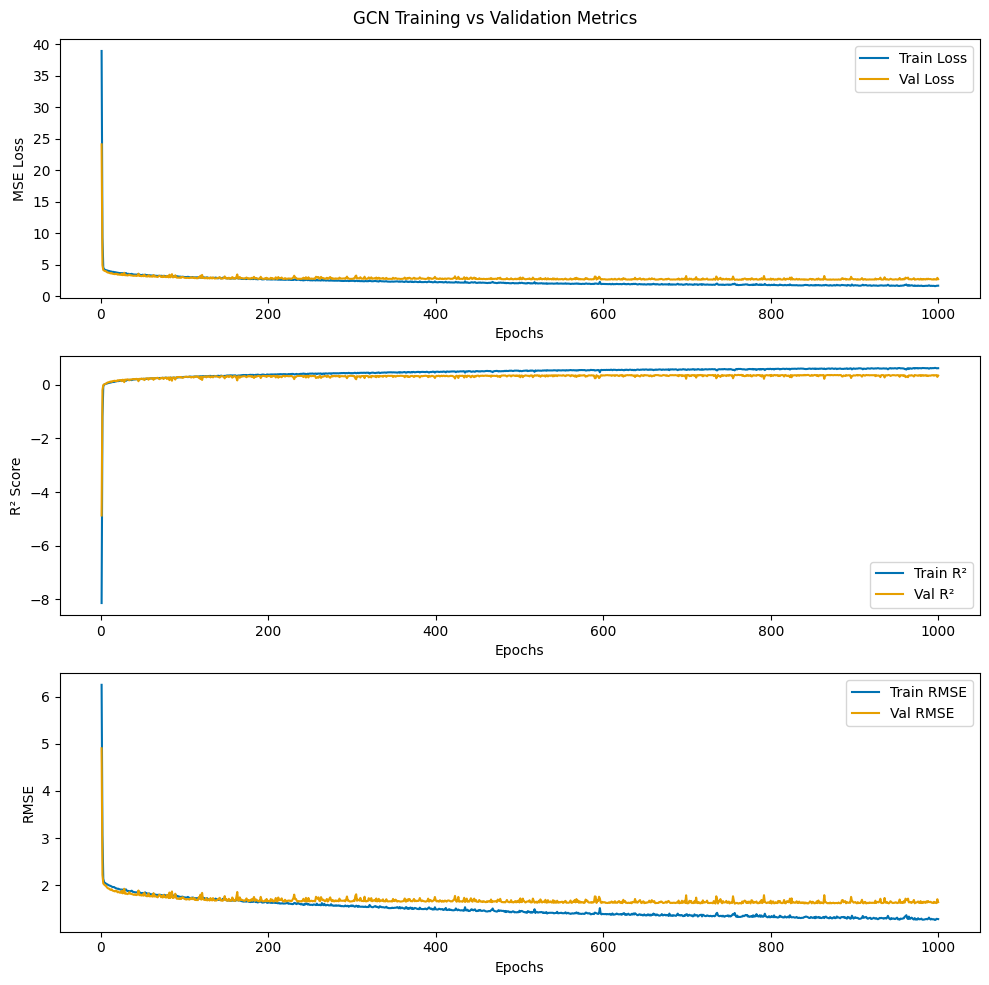

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses)+1)
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.plot(epochs, train_losses, label="Train Loss", color="#0072B2")
plt.plot(epochs, valid_losses, label="Val Loss", color="#E69F00")
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("MSE Loss")

plt.subplot(3,1,2)
plt.plot(epochs, train_r2_scores, label="Train R²", color="#0072B2")
plt.plot(epochs, valid_r2_scores, label="Val R²", color="#E69F00")
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("R² Score")

plt.subplot(3,1,3)
plt.plot(epochs, train_rmse_scores, label="Train RMSE", color="#0072B2")
plt.plot(epochs, valid_rmse_scores, label="Val RMSE", color="#E69F00")
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("RMSE")

plt.suptitle("GCN Training vs Validation Metrics")
plt.tight_layout()
plt.show()

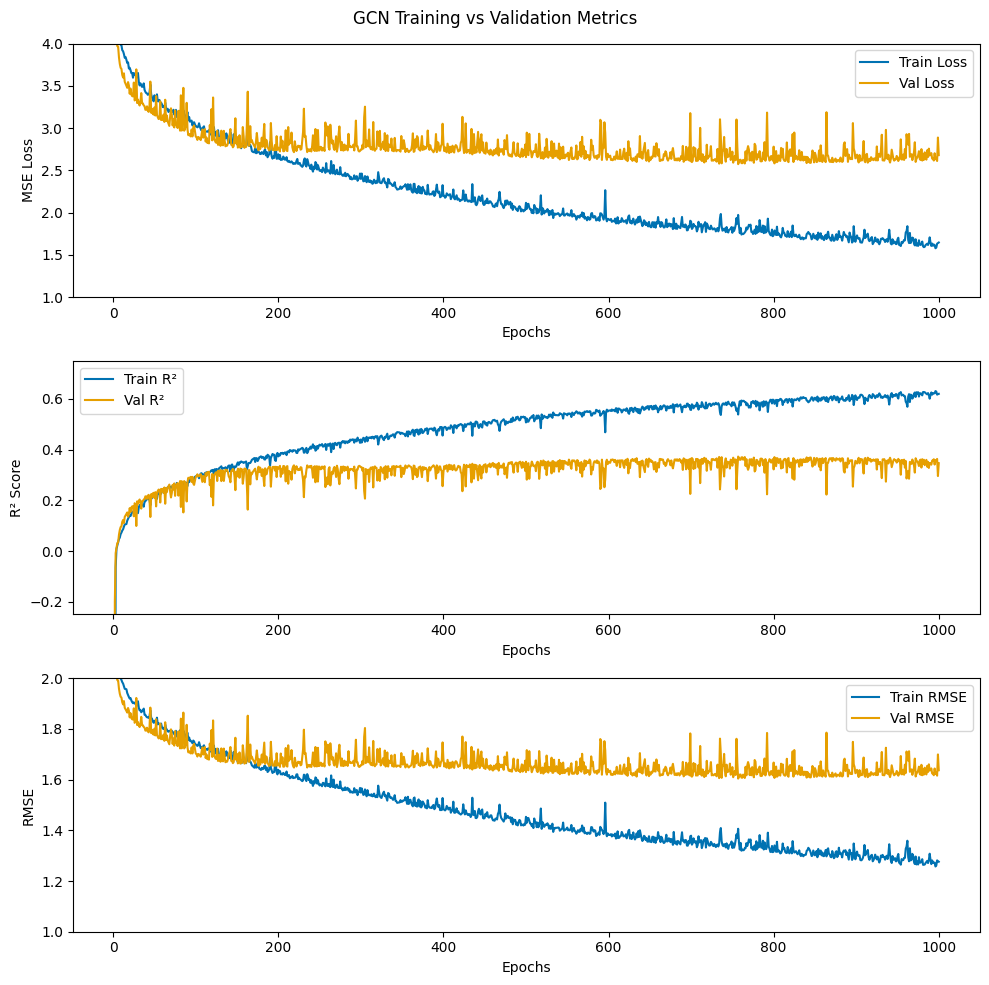

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses)+1)
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.plot(epochs, train_losses, label="Train Loss", color="#0072B2")
plt.plot(epochs, valid_losses, label="Val Loss", color="#E69F00")
plt.ylim(1, 4)
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("MSE Loss")

plt.subplot(3,1,2)
plt.plot(epochs, train_r2_scores, label="Train R²", color="#0072B2")
plt.plot(epochs, valid_r2_scores, label="Val R²", color="#E69F00")
plt.ylim(-0.25, 0.75)
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("R² Score")

plt.subplot(3,1,3)
plt.plot(epochs, train_rmse_scores, label="Train RMSE", color="#0072B2")
plt.plot(epochs, valid_rmse_scores, label="Val RMSE", color="#E69F00")
plt.ylim(1, 2)
plt.legend(); plt.xlabel("Epochs"); plt.ylabel("RMSE")

plt.suptitle("GCN Training vs Validation Metrics")
plt.tight_layout()
plt.show()